# 汎化と過学習

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 多項式回帰

$ y = \omega_0 + \omega_1x + \omega_2x^2 + \cdots + \omega_dx^d$

In [2]:
from solver import PolynomialRegression
from solver import LinearRegression

In [3]:
def f(x):
    return 1 + 2 * x

In [4]:
n = 10
np.random.seed(0)
x = np.random.random(n) * 10
y = f(x) + np.random.randn(n)

In [5]:
# 多項式回帰
model_p = PolynomialRegression(degree=10)
model_p.fit(x, y)

/home/jupyter/machine-learning-playground/01.essence_of_machine_learning/solver/linearreg.py:13: LinAlgWarning: Ill-conditioned matrix (rcond=1.30031e-30): result may not be accurate.
  self.w_ = linalg.solve(A, b)


In [6]:
# 線形回帰
model_l = LinearRegression()
model_l.fit(x, y)

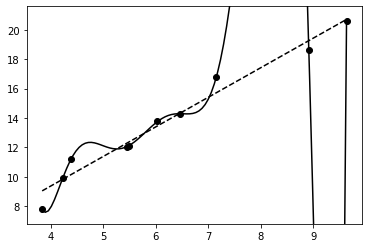

In [7]:
plt.ylim([y.min() - 1, y.max() + 1])

# 入力データをプロット
plt.scatter(x, y, color="k")

# 多項式回帰の結果をプロット
xp = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
yp = model_p.predict(xp)
plt.plot(xp, yp, color="k")

# 線形回帰の結果をプロット
xl = np.array([x.min(), x.max()]).reshape(-1, 1)
yl = model_l.predict(xl)
plt.plot( xl.ravel(), yl.ravel(), color="k", linestyle="dashed")

plt.show()

## モデルの汎化性能

In [8]:
# バイアス：予測値の平均と、真の値の差の二乗。平均的なズレ。
# バリアンス：予測値の分散。ばらつき具合。

In [9]:
xmin, xmax = 0, 5
np.random.seed(0)

In [10]:
def f(x):
    return 1 / (1 + x)

def sample(n):
    x = np.random.random(n) * (xmax - xmin) + xmin
    y = f(x)
    return x, y

In [11]:
xx = np.arange(xmin, xmax, 0.01)
yy = f(xx)
y_poly_sum = np.zeros(len(xx)) # 多項式回帰の予測値の合計
y_poly_sum_sq = np.zeros(len(xx)) # 多項式回帰の二乗誤差の合計
y_lin_sum = np.zeros(len(xx)) # 線形回帰の予測値の合計
y_lin_sum_sq = np.zeros(len(xx)) # 線形回帰の二乗誤差の合計

In [12]:
import warnings
warnings.filterwarnings("ignore")

from numpy.linalg import LinAlgError

In [13]:
n = 100000
for _ in range(n):
    x, y = sample(5) # 5点ランダムに取得する
    
    # 多項式回帰
    model_p = PolynomialRegression(4)
    
    # 逆行列を求められない場合に"Matrix is singular."の例外が発生する。
    # 例外が発生した場合はcontinue
    try:
        model_p.fit(x, y)
    except LinAlgError as e:
        print(e)
        continue
    
    y_poly = model_p.predict(xx)
    y_poly_sum += y_poly
    y_poly_sum_sq += (y_poly - yy) ** 2
    
    # 線形回帰
    model_l = LinearRegression()
    model_l.fit(x, y)
    y_lin = model_l.predict(xx.reshape(-1, 1))
    y_lin_sum += y_lin
    y_lin_sum_sq += (y_lin - yy) ** 2


Matrix is singular.
Matrix is singular.
Matrix is singular.


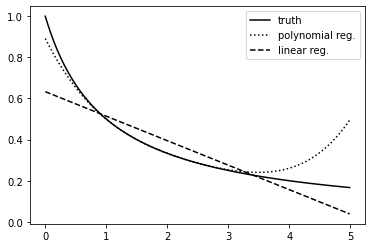

In [14]:
# 予測結果の平均値をプロット
plt.plot(xx, f(xx), label="truth", color="k", linestyle="solid") # 正解
plt.plot(xx, y_poly_sum / n, label="polynomial reg.", color="k", linestyle="dotted") # 多項式回帰
plt.plot(xx, y_lin_sum / n, label="linear reg.", color="k", linestyle="dashed") # 線形回帰
plt.legend()
plt.show()

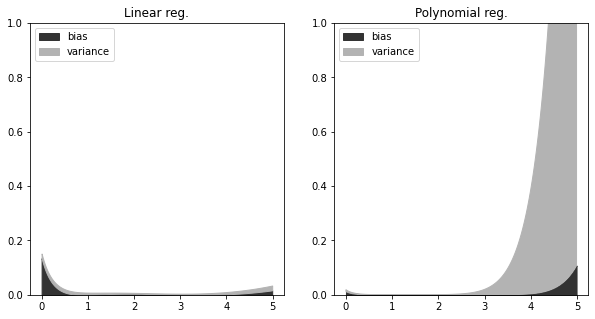

In [15]:
#　バイアスとバリアンスを求める
bias1 = (y_lin_sum / n - yy)**2
bias2 = (y_poly_sum / n - yy)**2
variance1 = y_lin_sum_sq / n
variance2 = y_poly_sum_sq / n

# 2つのプロットを作成
fig = plt.figure(figsize=(10, 5))
ax1, ax2 = fig.subplots(1, 2)

# グラフのタイトルと範囲をセット
ax1.set_title("Linear reg.")
ax2.set_title("Polynomial reg.")
ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)

# 各xについて、バイアスとバリアンスを塗りつぶし
ax1.fill_between(xx, 0, bias1, color="0.2", label="bias") # 0からバイアスの範囲を塗りつぶし
ax1.fill_between(xx, bias1, variance1, color="0.7", label="variance") #　バイアスからバリアンスの範囲を塗りつぶし
ax1.legend(loc="upper left")

ax2.fill_between(xx, 0, bias2, color="0.2", label="bias")
ax2.fill_between(xx, bias2, variance2, color="0.7", label="variance")
ax2.legend(loc="upper left")

plt.show()

In [16]:
print(bias1.min(), bias1.max())
print(bias2.min(), bias2.max())
print(variance1.min(), variance1.max())
print(variance2.min(), variance2.max())

3.184336552736539e-08 0.1345644028004733
2.2635821879033156e-13 0.1074983208245024
0.004192469856807574 0.15167626691877914
0.000134576028262766 3.8280399917136285
